<a href="https://colab.research.google.com/github/chetan-parthiban/Conceptors/blob/master/BERT_Cosine_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install flair

In [0]:
from flair.embeddings import BertEmbeddings
from flair.data import Sentence
embedding = BertEmbeddings('bert-large-uncased', layers = '23')
embedding2 = BertEmbeddings('bert-large-uncased', layers = '1')

In [0]:
import numpy as np
import torch
import matplotlib.pyplot as plt
t = np.transpose
%matplotlib inline

In [22]:
from tqdm import tqdm_notebook as tqdm
import nltk
nltk.download('brown')

from nltk.corpus import brown
brown_corpus = brown.sents()
brown_corpus = brown_corpus[:20000]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [5]:
brown_e = []
brown_e2 = []
for s in tqdm(brown_corpus):
    sentence = Sentence(' '.join(s))
    embedding.embed(sentence)
    sent_emb = torch.stack([token.embedding for token in sentence]).numpy()
    brown_e.append(sent_emb)
    sentence = Sentence(' '.join(s))
    embedding2.embed(sentence)
    sent_emb = torch.stack([token.embedding for token in sentence]).numpy()
    brown_e2.append(sent_emb)

100%|██████████| 20000/20000 [44:13<00:00,  7.62it/s]


In [0]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA, TruncatedSVD, KernelPCA
from   sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse as ellipse
from scipy.spatial.distance import pdist



np.set_printoptions(suppress=True)
np.set_printoptions(precision=14)
plt_style = 'seaborn-talk'

# Experimental: HDBScan is a state-of-the-art clustering algorithm
hdbscan_available = True
try:
    import hdbscan
except ImportError:
    hdbscan_available = False

In [0]:
def do_plot(X_fit, title=None, labels = [''], circ = False, legend = True):
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0,1,num_labels))
    print(X_fit.shape, label_types)
    with plt.style.context(plt_style):
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            
            for lab,col in zip(label_types, colors):
                if num_labels>1:
                    idxs = [i for i,v in enumerate(labels) if v == lab]
                    ax.scatter([X_fit[i,0] for i in idxs], 
                               [X_fit[i,1] for i in idxs], 
                               c = [col], label = lab)
                else:
                    ax.scatter(X_fit[:,0],
                               X_fit[:,1],
                               c = [col])
        elif dimension == 3:
            ax = fig.add_subplot(111, projection ='3d')
            for lab, col in zip(label_types,colors):
                ax.scatter(X_fit[labels==lab,0],
                           X_fit[labels==lab,1],
                           X_fit[labels==lab,2],
                           c=[col])
        else:
            raise Exception('Bad Dimensions')
        plt.title(title)
        if num_labels >1 and legend:
            ax.legend()
        if circ:
            circ = ellipse((0,0),2,2, edgecolor = 'k', facecolor = 'none')
            ax.add_artist(circ)
            plt.xlim((-1,1))
            plt.ylim((-1,1))
        plt.show()

In [0]:
def pick_embeddings(corpus,sent_embs,word_list):
    X = []
    labels = []
    sents = []
    for i, s in enumerate(corpus):
        for j, w in enumerate(s):
            if w in word_list:
                X.append(sent_embs[i][j])
                labels.append(w)
                sents.append(s)
    return (X, labels, sents)

(1703, 1024)
[0.000008795515  0.000008553246  0.000008302348  0.00000819209
 0.000008108533  0.000007928875  0.00000770055   0.0000072315415
 0.0000064816522 0.             ]
[0.9416515      0.92859226     0.9148714      0.90877616
 0.9041296      0.89405733     0.88109034     0.8538371
 0.80835557     0.000009498496]
[[-0.0066438233 -0.013534458  -0.014067318  ... -0.02613182
  -0.0073065273  0.009309357 ]
 [-0.017302325   0.017078944  -0.041831434  ...  0.042421393
  -0.019992474   0.031828012 ]]


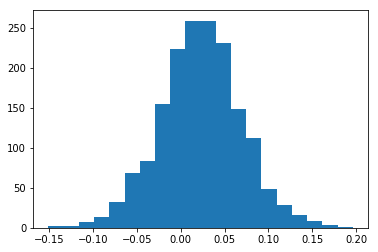

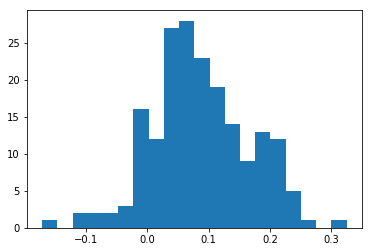

[1. 1.]
(2616, 2) ['it', 'she']


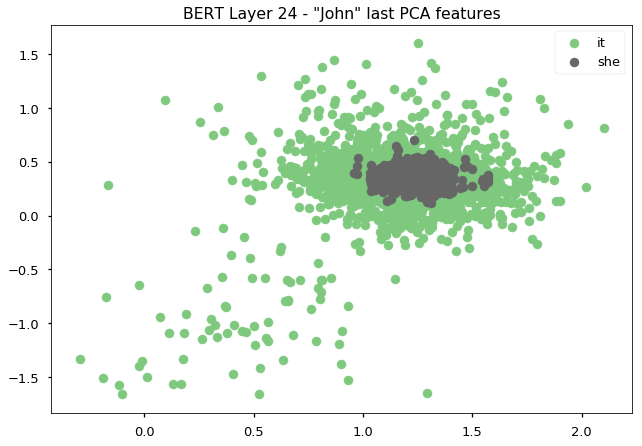

In [133]:
X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['he'])
X = np.asarray(X)
m = np.mean(X, axis = 0).size
pca = PCA()
pca.fit(X)
print(X.shape)
print(pca.explained_variance_ratio_[-10:])
print(pca.singular_values_[-10:])
trans = pca.components_[-3:-1]
print(trans)
smin = 1 / pca.singular_values_[-1]

X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['he'])
X = np.asarray(X)

plt.hist(pca.transform(X)[:,-1]*smin,bins = 20)
plt.show()

X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['John'])
X = np.asarray(X)



plt.hist(pca.transform(X)[:,-1]*smin,bins = 20)
plt.show()

X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['it','she'])
X = np.asarray(X)
Y = X @ trans.T
print(np.apply_along_axis(np.linalg.norm, 1, trans))


do_plot(Y,'BERT Layer 24 - "John" last PCA features', labels=labels, circ = False)

[0.106864125 0.057817284]
(266, 2) ['children', 'executive', 'marriage', 'professional']


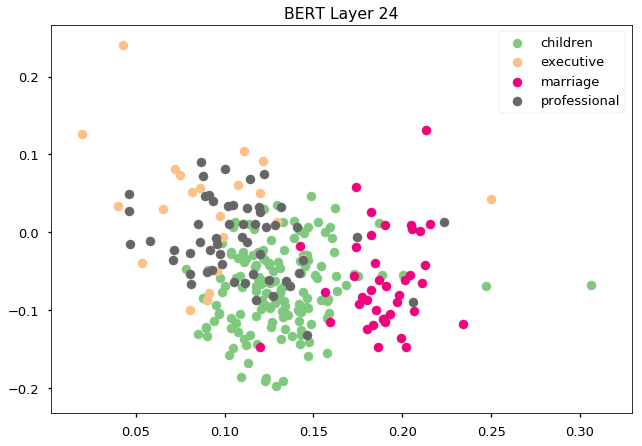

(2474, 2) ['John', 'Mary', 'he', 'husband', 'she', 'wife']


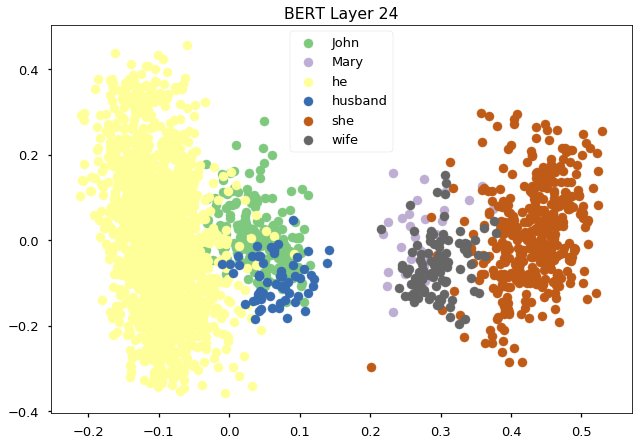

In [62]:
X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['he','she'])
X = np.asarray(X)
norm = np.apply_along_axis(np.linalg.norm, 1, X)
X = X / norm[:, None]
pca = PCA(n_components = 2)
pca.fit(X)
print(pca.explained_variance_ratio_)

X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['executive','professional', 'marriage', 'children'])
X = np.asarray(X)
norm = np.apply_along_axis(np.linalg.norm, 1, X)
X = X / norm[:, None]
do_plot(pca.transform(X), 'BERT Layer 24', labels = labels)


X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['husband', 'wife', 'Mary', 'John', 'he','she'])
X = np.asarray(X)
norm = np.apply_along_axis(np.linalg.norm, 1, X)
X = X / norm[:, None]


do_plot(pca.transform(X), 'BERT Layer 24', labels=labels, circ = False)

[0.000061540275   0.000050350445   0.000042433112   0.0000394214
 0.000026084588   0.000020687434   0.00001035014    0.0000072917314
 0.00000000000018 0.              ]
(190, 2) ['John']


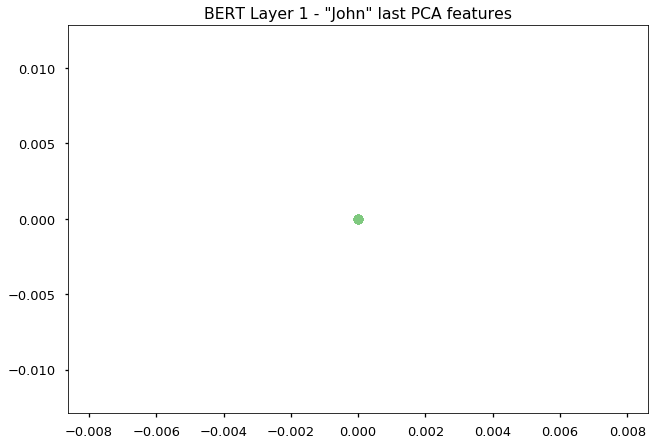

[0.21702664 0.06180575]
(89, 2) ['doctor', 'executive', 'marriage', 'nurse']


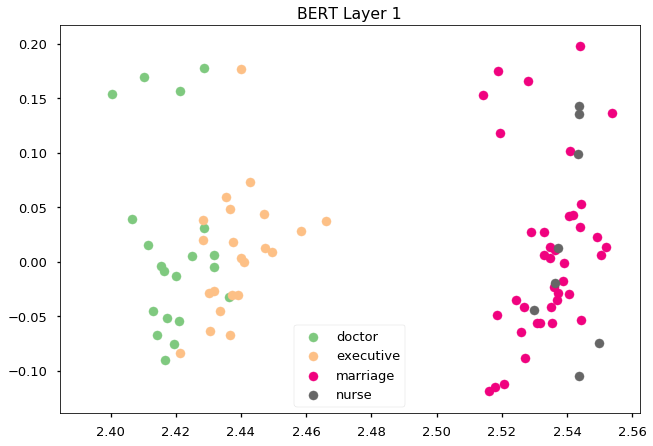

(2572, 2) ['John', 'Mary', 'father', 'he', 'husband', 'mother', 'she', 'wife']


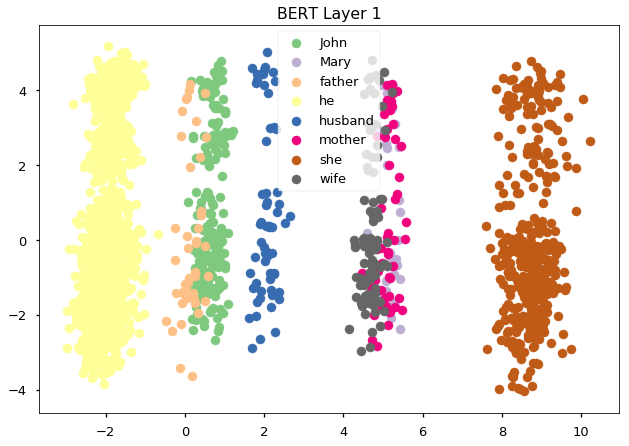

(2263, 2) ['dog', 'fly', 'he', 'run', 'she', 'walk']


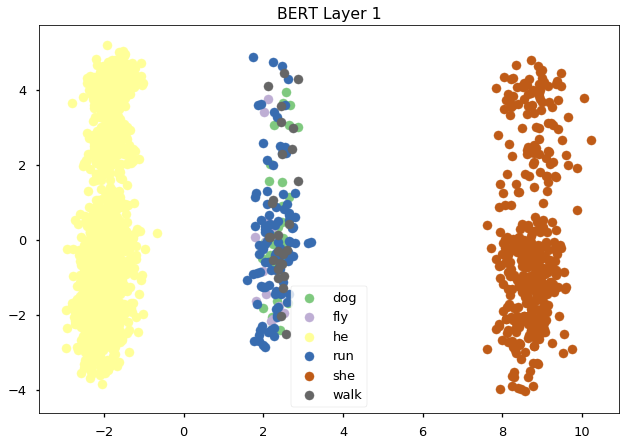

In [31]:
X, labels, _ = pick_embeddings(brown_corpus, brown_e2, ['John'])
X = np.asarray(X)
norm = np.apply_along_axis(np.linalg.norm, 1, X)
X = X / norm[:, None]
pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_[-10:])

do_plot(pca.transform(X)[:,-2:],'BERT Layer 1 - "John" last PCA features', labels=labels, circ = False)

X, labels, _ = pick_embeddings(brown_corpus, brown_e2, ['he', 'she'])
X = np.asarray(X)
# norm = np.apply_along_axis(np.linalg.norm, 1, X)
# X = X / norm[:, None]
pca = PCA(n_components = 2)
pca.fit(X)
print(pca.explained_variance_ratio_)

X, labels, _ = pick_embeddings(brown_corpus, brown_e2, ['executive', 'marriage', 'doctor', 'nurse'])
X = np.asarray(X)
norm = np.apply_along_axis(np.linalg.norm, 1, X)
X = X / norm[:, None]
do_plot(pca.transform(X), 'BERT Layer 1', labels = labels)


X, labels, _ = pick_embeddings(brown_corpus, brown_e2, ['husband', 'wife', 'Mary', 'John','father','mother','he','she'])
X = np.asarray(X)
# norm = np.apply_along_axis(np.linalg.norm, 1, X)
# X = X / norm[:, None]


do_plot(pca.transform(X), 'BERT Layer 1', labels=labels, circ = False)

X, labels, _ = pick_embeddings(brown_corpus, brown_e2, ['run','walk','dog','fly','he','she'])
X = np.asarray(X)
# norm = np.apply_along_axis(np.linalg.norm, 1, X)
# X = X / norm[:, None]


do_plot(pca.transform(X), 'BERT Layer 1', labels=labels, circ = False)

In [25]:
wordlist = ['John','bad','he','she','it','dog','run','family','executive','good', 'Mary', 'walk', 'husband', 'mother', 'wife', 'father']
variance_ratios = []
for word in tqdm(wordlist): 
    X, labels, _ = pick_embeddings(brown_corpus, brown_e, [word])
    X = np.asarray(X)
    pca = PCA()
    pca.fit(X)
    variance_ratios.append(pca.explained_variance_ratio_[-1]/pca.explained_variance_ratio_[-2])
    
print('\n',variance_ratios)
print(np.format_float_scientific(np.mean(variance_ratios[1:])))



 [0.0057008103, 5.202603e-12, 1.3807173e-10, 5.0252584e-09, 8.9968427e-10, 9.397156e-12, 2.5871551e-11, 1.6169162e-10, 4.3084915e-13, 1.7226015e-09, 2.4789144e-12, 2.520901e-12, 1.6619444e-11, 7.517672e-12, 4.4695095e-11, 1.865599e-11]
5.3871313e-10


In [12]:
!nvidia-smi

Tue Jun 11 19:29:53 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    55W / 149W |   3574MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  